In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import accuracy_score

with open('/data/cheryl/fuwai/card/features.pkl', 'rb') as f:
    data=pickle.load(f)

with open('/data/cheryl/fuwai/card/labels.pkl', 'rb') as f:
    label=pickle.load(f)

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
train_top_k_accuracy_scores=[]
test_top_k_accuracy_scores=[]
for train_index, test_index in kf.split(label):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]
    clf = SVC(C=100)
    clf.fit(X_train, y_train)
    Y_train_pred = clf.predict(X_train)
    # print("Train confusion matrix \n",confusion_matrix(y_train, Y_train_pred))
    Y_test_pred = clf.predict(X_test)

    train_top_k_accuracy_scores.append(accuracy_score(y_train,Y_train_pred))
    test_top_k_accuracy_scores.append(accuracy_score(y_test,Y_test_pred))
print(np.mean(train_top_k_accuracy_scores))
print(np.mean(test_top_k_accuracy_scores))









TRAIN: [ 193  194  195 ... 1918 1919 1920] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192]
TRAIN: [   0    1    2 ... 1918 1919 1920] TEST: [193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 

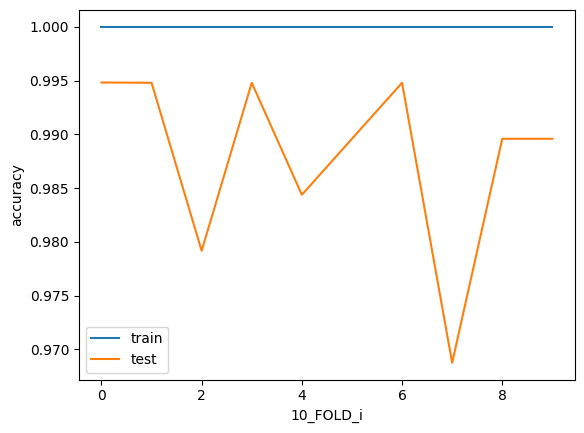

In [3]:
plt.figure()
plt.plot(train_top_k_accuracy_scores,label='train')
plt.plot(test_top_k_accuracy_scores,label='test')
plt.xlabel('10_FOLD_i')
plt.ylabel("accuracy")
plt.legend()
plt.show()